# Tablular Play Ground Series- Sep 2022



In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# generates training and testing datasets
from sklearn.model_selection import train_test_split

# scale features in dataset
from sklearn.preprocessing import StandardScaler

# xgboost 
from xgboost import XGBRegressor

## Importing files

In [2]:
test = pd.read_csv("../input/tabular-playground-series-sep-2022/test.csv")
train = pd.read_csv("../input/tabular-playground-series-sep-2022/train.csv")
submission = pd.read_csv("../input/tabular-playground-series-sep-2022/sample_submission.csv")

display(test)
display(train)

row_id        date  country       store  \
0       70128  2021-01-01  Belgium  KaggleMart   
1       70129  2021-01-01  Belgium  KaggleMart   
2       70130  2021-01-01  Belgium  KaggleMart   
3       70131  2021-01-01  Belgium  KaggleMart   
4       70132  2021-01-01  Belgium  KaggleRama   
...       ...         ...      ...         ...   
17515   87643  2021-12-31    Spain  KaggleMart   
17516   87644  2021-12-31    Spain  KaggleRama   
17517   87645  2021-12-31    Spain  KaggleRama   
17518   87646  2021-12-31    Spain  KaggleRama   
17519   87647  2021-12-31    Spain  KaggleRama   

                                product  
0            Kaggle Advanced Techniques  
1                Kaggle Getting Started  
2                    Kaggle Recipe Book  
3      Kaggle for Kids: One Smart Goose  
4            Kaggle Advanced Techniques  
...                                 ...  
17515  Kaggle for Kids: One Smart Goose  
17516        Kaggle Advanced Techniques  
17517            Kaggle Getting Started  
17518                Kaggle Recipe Book  
17519  Kaggle for Kids: One Smart Goose  

[17520 rows x 5 columns]

row_id        date  country       store  \
0           0  2017-01-01  Belgium  KaggleMart   
1           1  2017-01-01  Belgium  KaggleMart   
2           2  2017-01-01  Belgium  KaggleMart   
3           3  2017-01-01  Belgium  KaggleMart   
4           4  2017-01-01  Belgium  KaggleRama   
...       ...         ...      ...         ...   
70123   70123  2020-12-31    Spain  KaggleMart   
70124   70124  2020-12-31    Spain  KaggleRama   
70125   70125  2020-12-31    Spain  KaggleRama   
70126   70126  2020-12-31    Spain  KaggleRama   
70127   70127  2020-12-31    Spain  KaggleRama   

                                product  num_sold  
0            Kaggle Advanced Techniques       663  
1                Kaggle Getting Started       615  
2                    Kaggle Recipe Book       480  
3      Kaggle for Kids: One Smart Goose       710  
4            Kaggle Advanced Techniques       240  
...                                 ...       ...  
70123  Kaggle for Kids: One Smart Goose       614  
70124        Kaggle Advanced Techniques       215  
70125            Kaggle Getting Started       158  
70126                Kaggle Recipe Book       135  
70127  Kaggle for Kids: One Smart Goose       202  

[70128 rows x 6 columns]

## Split datetime values

Since the results of this data is determined by the time, it is best to breakdown the date into separate columns. Doing this will help us better identify any trends.

In [3]:
# convert date to datetime data type
test['date'] = pd.to_datetime(test.date)

# datetime splitting has begun
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['weekday'] = test['date'].dt.weekday
test['dayofmonth'] = test['date'].dt.day
test['dayofyear'] = test['date'].dt.dayofyear

# convert this date too
train['date'] = pd.to_datetime(train.date)

# split this dataset next
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['weekday'] = train['date'].dt.weekday
train['dayofmonth'] = train['date'].dt.day
train['dayofyear'] = train['date'].dt.dayofyear

# dropping the date column now.
train = train.drop(['row_id', 'date'], axis=1)
test = test.drop(['row_id', 'date'], axis=1)

train

country       store                           product  num_sold  year  \
0      Belgium  KaggleMart        Kaggle Advanced Techniques       663  2017   
1      Belgium  KaggleMart            Kaggle Getting Started       615  2017   
2      Belgium  KaggleMart                Kaggle Recipe Book       480  2017   
3      Belgium  KaggleMart  Kaggle for Kids: One Smart Goose       710  2017   
4      Belgium  KaggleRama        Kaggle Advanced Techniques       240  2017   
...        ...         ...                               ...       ...   ...   
70123    Spain  KaggleMart  Kaggle for Kids: One Smart Goose       614  2020   
70124    Spain  KaggleRama        Kaggle Advanced Techniques       215  2020   
70125    Spain  KaggleRama            Kaggle Getting Started       158  2020   
70126    Spain  KaggleRama                Kaggle Recipe Book       135  2020   
70127    Spain  KaggleRama  Kaggle for Kids: One Smart Goose       202  2020   

       month  day  weekday  dayofmonth  dayofyear  
0          1    1        6           1          1  
1          1    1        6           1          1  
2          1    1        6           1          1  
3          1    1        6           1          1  
4          1    1        6           1          1  
...      ...  ...      ...         ...        ...  
70123     12   31        3          31        366  
70124     12   31        3          31        366  
70125     12   31        3          31        366  
70126     12   31        3          31        366  
70127     12   31        3          31        366  

[70128 rows x 10 columns]

## Data Exploration

First lets plot num_sold onto a histogram so see the distribution of values.Then begin to list out the mean, median, mode and standard deviation. The standard deviation will give us an estimate of how much the values fluxuate around the mean. 

After created the histogram the data has a right skew and the values drop considerably around 500. These are our outliers. Outliers will impact the accuracy of our model because there aren't enough samples of data to generate a prediction. With that being said the outliers account for 1.5% of the data and will have as much of an impact on the model.

In [4]:
fig = px.histogram(train, x="num_sold")
fig.show()

print("Mean = ", train.num_sold.mean())
print("Median = ", train.num_sold.median())
print("Mode = ", train.num_sold.mode(), "\n")
print("Standard Deviation = ", train.num_sold.std(), "\n")

count = (train["num_sold"] > 500).sum()
total = train["num_sold"].count()
print("Number greater than 500 = ", count)
print("Total count = ", total)
print("Percent Higher than 500 = ", count/total)

print("\n", "Data Types")
display(train.dtypes)

Mean =  194.29698551220625
Median =  148.0
Mode =  0    81
dtype: int64 

Standard Deviation =  126.89387358161959 

Number greater than 500 =  1021
Total count =  70128
Percent Higher than 500 =  0.014559091946155601

 Data Types


country       object
store         object
product       object
num_sold       int64
year           int64
month          int64
day            int64
weekday        int64
dayofmonth     int64
dayofyear      int64
dtype: object

Out dataset consists almost entirely of categorical data, the exception being num_sold. Country, store and product are all nominal so the order doesn't matter when creating the charts. Year, month, day are ordinal, displaying these values in their specific order can help better identify and understand trends. 

I use box and whisker plots for these visuals because they are great for seeing the distribution of of data for each group. What you'll notice is a concentration of values between 0 and 400 then then a drop off around 500. This is consistant with histogram before.

In [5]:
fig = px.box(train, x="country", y="num_sold", color="country", title="Number Sold by Country")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(showlegend=False)
fig.show()

In [6]:
fig = px.box(train, x="store", y="num_sold", color="store")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(showlegend=False)
fig.show()

In [7]:
fig = px.box(train, x="product", y="num_sold", color="product")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(showlegend=False)
fig.show()

In [8]:
fig = px.box(train, x="year", y="num_sold", color="year")
fig.update_layout(showlegend=False)
fig.show()

In [9]:
fig = px.box(train, x="month", y="num_sold", color="month", title="num_sold by month")
fig.update_layout(showlegend=False)
fig.show()

In [10]:
fig = px.box(train, x="day", y="num_sold", color="day", title="num_sold by day")
fig.update_layout(showlegend=False)
fig.show()

In [11]:
fig = px.box(train, x="weekday", y="num_sold", color="weekday", title="num_sold by weekday")
fig.update_layout(showlegend=False)
fig.show()

## Data Transformation

Before creating a model the nominal categories should be converted to ordinal integers. To do this we will use the ordinal encoder from sklearn.

In [12]:
enc = OrdinalEncoder()

for col1 in train:
    if train[col1].dtype=="object":
        train[col1] = enc.fit_transform(train[col1].values.reshape(-1,1))
        
for col2 in test:
    if test[col2].dtype=="object":
        test[col2] = enc.fit_transform(test[col2].values.reshape(-1,1))
        
train = train[["country", "store", "product", "year", "month", "day", "weekday", "dayofmonth", "dayofyear", "num_sold"]]
test
        

country  store  product  year  month  day  weekday  dayofmonth  \
0          0.0    0.0      0.0  2021      1    1        4           1   
1          0.0    0.0      1.0  2021      1    1        4           1   
2          0.0    0.0      2.0  2021      1    1        4           1   
3          0.0    0.0      3.0  2021      1    1        4           1   
4          0.0    1.0      0.0  2021      1    1        4           1   
...        ...    ...      ...   ...    ...  ...      ...         ...   
17515      5.0    0.0      3.0  2021     12   31        4          31   
17516      5.0    1.0      0.0  2021     12   31        4          31   
17517      5.0    1.0      1.0  2021     12   31        4          31   
17518      5.0    1.0      2.0  2021     12   31        4          31   
17519      5.0    1.0      3.0  2021     12   31        4          31   

       dayofyear  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
17515        365  
17516        365  
17517        365  
17518        365  
17519        365  

[17520 rows x 9 columns]

In [13]:
corrmat = train.corr()

fig = px.imshow(corrmat)
fig.show()

In [14]:
# split data into independent 'X' variables
X = train.iloc[:, 0:9].values

# create a target dataset that can be used for training and validation
Y = train["num_sold"]

# split dataset into 80% training set and 20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

print("Train and Test datasets are created")

Train and Test datasets are created


## Create K Nearest Neighbors Model

In [15]:
model = XGBRegressor(n_estimators=10000, early_stopping_rounds=20, learning_rate=0.05)

model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_test, Y_test)], verbose=False)

print(model.score(X_train, Y_train))

0.9912802009906094


In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)
print(model.score(X_test, Y_test))

0.9895395619666423


In [17]:
MSE = np.square(np.subtract(Y_test, y_pred)).mean()

print("MSE: ", MSE)

RMSE = np.sqrt(MSE)
print("RMSE: ", RMSE)

MSE:  172.60145444175103
RMSE:  13.137787273424358


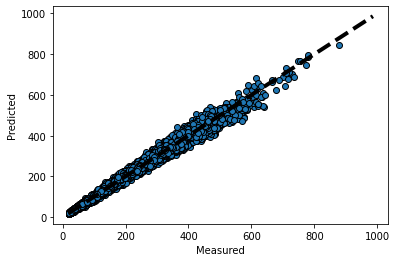

In [18]:
y = train.num_sold
fig,  ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [19]:
predictions = model.predict(test)
predictions = predictions.astype(int)
predictions

array([496, 413, 346, ..., 163, 141, 225])

In [20]:
submission['num_sold'] = predictions

submission.to_csv("submission.csv", index=False)
submission = pd.read_csv("submission.csv")
submission

row_id  num_sold
0       70128       496
1       70129       413
2       70130       346
3       70131       540
4       70132       170
...       ...       ...
17515   87643       698
17516   87644       205
17517   87645       163
17518   87646       141
17519   87647       225

[17520 rows x 2 columns]